<a href="https://colab.research.google.com/github/panzershracker/Time-series-retraining/blob/master/HW_les_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Задание**
    1.Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в 
    представление по 1 месяцу.

    2.Подберите параметры модели SARIMAX для этого ряда.

    3.Сделайте вывод о том, как изменилась модель по сравнению с недельной.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import itertools
import statsmodels.api as sm
import warnings
# import timeit

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/DS for business Retraining/les 3/my_PJME_MW.csv', index_col=[0], parse_dates=[0])

In [0]:
df.head(3)

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0


In [0]:
col_1 = df.columns[1]

In [0]:
mon_res = df.resample('M').mean()

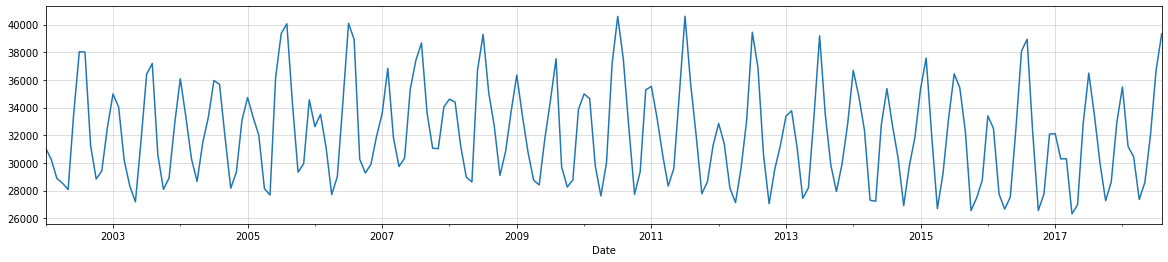

In [0]:
plt.figure(figsize=(20,4))
mon_res[col_1].plot()

plt.grid(alpha=.5)
plt.show()

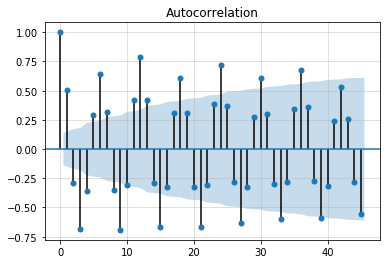

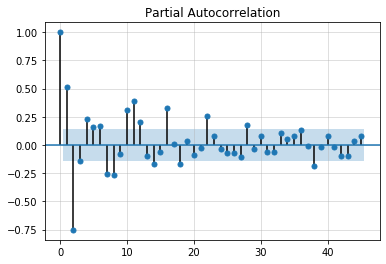

In [0]:
sm.graphics.tsa.plot_acf(mon_res[col_1], lags=45)
plt.grid(alpha=.5)

sm.graphics.tsa.plot_pacf(mon_res[col_1], lags=45)

plt.grid(alpha=.5)
plt.show()

In [0]:
# warnings.filterwarnings('ignore')
# p = d = q = range(0,3)

# pdq = list(itertools.product(p,d,q))
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [0]:
# best_aic = np.inf
# best_pdq = None
# best_spdq = None

In [0]:
# %%timeit

# for param in pdq:
#   for seasonal_param in seasonal_pdq:
#     try:
#       mod = sm.tsa.statespace.SARIMAX(mon_res[col_1].values[:-24], order=param,
#                                       seasonal_order=seasonal_param,
#                                       enforce_stationarity=False,
#                                       enforce_invertibility=False)
#       result = mod.fit()
#       print(f'ARIMA {param} x {seasonal_param}, AIC = {result.aic}')
#       if result.aic < best_aic:
#         best_aic = result.aic
#         best_pdq = param
#         best_spdq = seasonal_param

#     except:
#       print('Error skip')
#       continue


# print(f'BEST {best_pdq} x {best_spdq}, AIC = {best_aic}')

In [0]:
# best = 'BEST (2, 1, 0) x (2, 2, 1, 26), AIC = 1206.8167833711614' -  лучший результат в предыдущем поиске.

Касаемо перебора: у меня долго работал подбор - я взял range(0,4) и это заняло около 9 часов, не знаю, была ли где то ошибка, но это длилось слишком долго и даже не закончилось, и не досчиталось а повисло :)
В общем и целом: не обладая достаточными вычислительными мощностями - не вижу смысла в итеративном переборе, т.к. на домашних или колабовских мощностях можно встретить старость не узнав оптимальные параметры модели :) У меня, вроде, неплохо получилось прикинуть в ручную и подобрать коэффициенты.
Возможно стоило считать на юпитере и было бы быстрее, но на работе его нет.

In [43]:
model = sm.tsa.statespace.SARIMAX(mon_res[col_1].values[:-24], order=(2,1,2),
                                  seasonal_order=(1,1,2,12),
                                  enforce_stationarity=False,
                                  enforce_invertbility=False)

result_opt = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [44]:
print(f'AIC = {result_opt.aic}')

AIC = 2412.732879829705


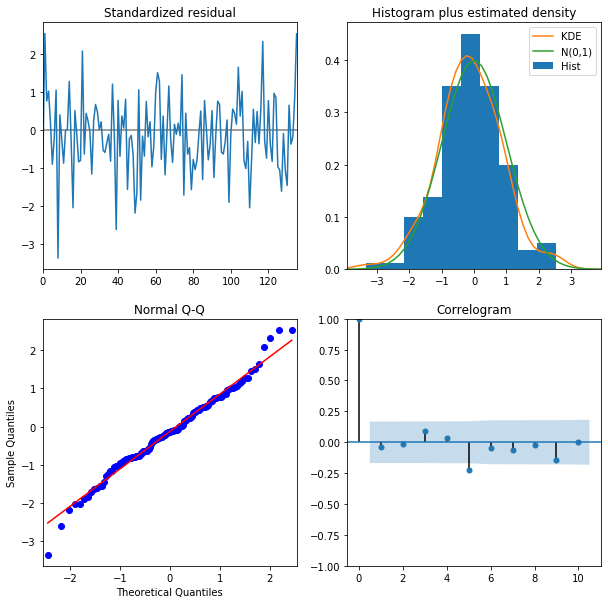

In [45]:
result_opt.plot_diagnostics(figsize=(10,10))
plt.show()

Не совсем понимаю как интерпретировать эти графики. По идее, распределение выглядит не совсем как нормальное - среднее сьехало вправо. По поводу коррелограммы - не все значения находятся в корридоре, и я не понимаю насколько это хорошо/плохо. Если верно понимаю, то все таки присутствует какая то корявая сезонность, которая говорит о не полной стационарности. С регрессией вроде все более менее.
Главный вопрос: как бы стоило поступить в данной ситуации? Где и какие параметры стоило подкрутить, чтобы ряд оказался полностью стационарным?

In [0]:
pred = result_opt.forecast(48)

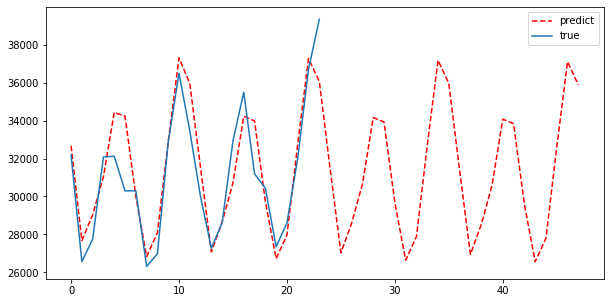

In [47]:
plt.figure(figsize=(10,5))

plt.plot(pred, '--', c='r', label='predict')
plt.plot(mon_res[col_1].values[-24:], label='true')

plt.legend()

In [49]:
fuller = sm.tsa.stattools.adfuller(result_opt.resid)
fuller

(-5.047282453980033,
 1.787658582403411e-05,
 13,
 162,
 {'1%': -3.471374345647024,
  '10%': -2.5763733302850174,
  '5%': -2.8795521079291966},
 2869.038735146767)

P-value, вроде, почти нулевой, но параметр теста Дики-Фулера сильно превышает 
10% критическое значение. То есть выхходит что ряд не стационарен?

Касаемо вывода из ДЗ - я не понял с какой недельной моделью надо сравнивать.
Так же я не понял что в вашем ноутбуке значила переменная predict_opt. Какой-то оптимум? откуда он и зачем?

#**!**
Т.к. я туго соображаю в этой дисциплине, подведу краткий итог, и напишу некоторые утверждения так как я их понял а вы поправьте в тех моментах где я не прав:

    1.ресемплировал ряд по месяцам
    2.график автокор. показал довольно сильную связь вплоть до 36 отсчета(в 
    месячных пересчетах)
    3.график автокор. первых разностей показал связь до 12 отсчета - это 
    истинная сезонность(она и была установлена 4-ым значением seasonal_order 
    при обучении модели)
    4.для обучения мы взяли весь ряд без последних 24 отсчетов
    5.для валидации мы взяли последние 24 отсчета
    6.возможно по классике разделить ряд на train и test для удобства
    7.показатель AIC не всегда говорит о том что параметры модели оптимальны
    8.выход за рамки корридора на коррелограмме при вызове plot_diagnostics 
    вызван тем, что необходимо взять разности второго порядка
    9.то же касается и графика распределения, т.к. ряд не стационарен - 
    распределение не настолько близкое к нормальному и остаточная сезонность 
    портит "нормальность" распределения
    10.либо два предыдущих пункта следуют из неверно определенной сезонности 
    изначально
    11.в данной модели я предсказал 48 сесяцев и сравнил с 24 тестовыми для 
    оценки правдоподобности предсказания за пределами конца ряда
    12.параметр теста Дики-Фуллера подтверждает догадки из графиков 
    plot_diagnostics - ряд с большой вероятностью нестационарен
    13.параметр p-value = 1.787658582403411e-05 
    можно считать как нулевой(или нет?)
    14.корридор на графике автокор - это доверительный интервал
    15.параметры pdq и PDQ - одно и тоже но в разных масштабах: первые - 
    описывают изменение внутри сезона, вторые - изменение самого сезона
    16.при каких манипуляциях модель дала бы результат лучше чем мой нанешний? 
    Проработка большего диапазона параметров и выявление лучших?
    17.меняя парамметры pdq, PDQ я замечал как предикт то уходил вверх, будто 
    при смене константы, то сезон начинал ехать то вниз то вверх, то весь 
    предикт становился похож на нарастающую синусоиду с сезоном направленным 
    вверх, и не понял какой параметр за что отвечает в графическом плане 
    отображения


Буду очень признателен если вы разьясните мне эти моменты и поправите в ошибочных суждениях. Спасибо!